In [ ]:
import pandas as pd
import seaborn as sns
from influxdb import InfluxDBClient
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Connect to InfluxDB
client = InfluxDBClient(host='localhost', port=8086)
client.switch_database('ISS')

# Define the measurement and time range
measurement1 = 'DE1Thing_HMD8310'
measurement2 = 'DE2Thing_HMD8310'
start_time = '2023-01-01T00:00:00Z'
end_time = '2023-02-01T00:00:00Z'

# Construct the queries
query1 = f'SELECT * FROM "{measurement1}" WHERE time >= \'{start_time}\' AND time < \'{end_time}\''
query2 = f'SELECT * FROM "{measurement2}" WHERE time >= \'{start_time}\' AND time < \'{end_time}\''

# Execute the queries and convert the results to DataFrames
results1 = client.query(query1)
df1 = pd.DataFrame.from_records(results1.get_points())
results2 = client.query(query2)
df2 = pd.DataFrame.from_records(results2.get_points())

# Convert columns to numeric
df1['RPM'] = pd.to_numeric(df1['RPM'])
df2['RPM'] = pd.to_numeric(df2['RPM'])





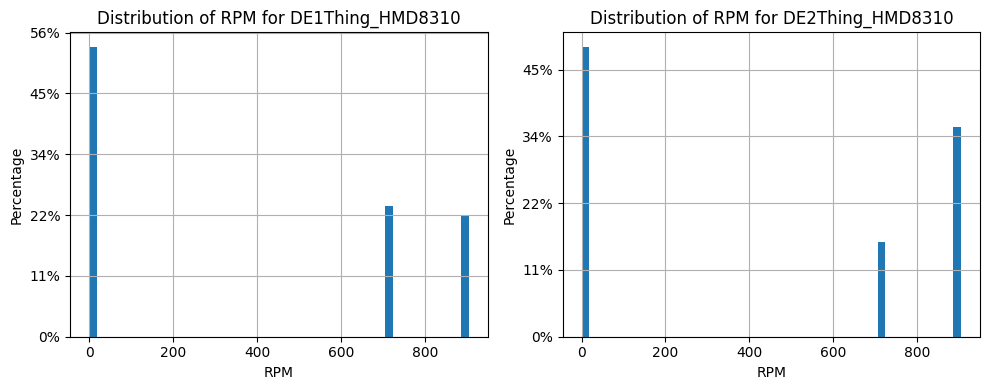

In [8]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df1['RPM'], bins=50)
ax1.set_title(f'Distribution of RPM for {measurement1}')
ax1.set_xlabel('RPM')
ax1.set_ylabel('Percentage')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(df1)))

ax2.hist(df2['RPM'], bins=50)
ax2.set_title(f'Distribution of RPM for {measurement2}')
ax2.set_xlabel('RPM')
ax2.set_ylabel('Percentage')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(df2)))

ax1.grid(True)
ax2.grid(True)

plt.tight_layout()
plt.show()

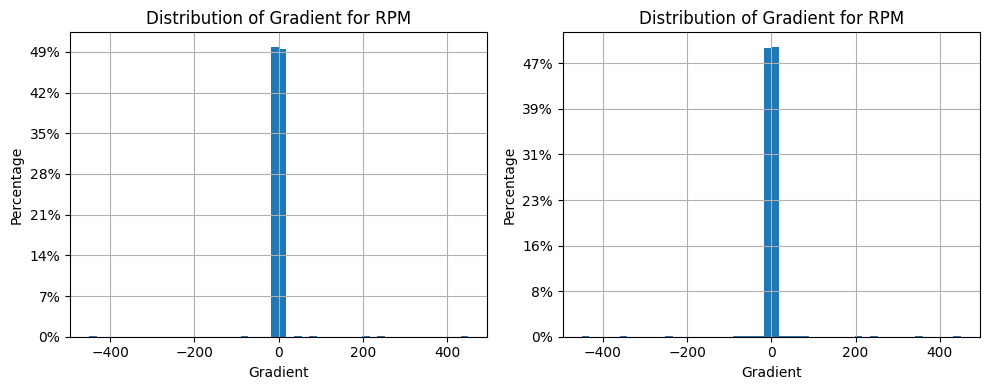

In [9]:
# Compute derivatives and remove zero values
deriv1 = np.gradient(df1['RPM'])
deriv1 = deriv1[deriv1 != 0]
deriv2 = np.gradient(df2['RPM'])
deriv2 = deriv2[deriv2 != 0]

# Plot histograms for derivatives
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(10, 4))

ax3.hist(deriv1, bins=50)
ax3.set_title(f'Distribution of Gradient for RPM')
ax3.set_xlabel('Gradient')
ax3.set_ylabel('Percentage')
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(deriv1)))

ax4.hist(deriv2, bins=50)
ax4.set_title(f'Distribution of Gradient for RPM')
ax4.set_xlabel('Gradient')
ax4.set_ylabel('Percentage')
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(deriv2)))

ax3.grid(True)
ax4.grid(True)

plt.tight_layout()
plt.show()
